# Alllife Credit Card Segmentation Project

## Abstract:
    
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Data Set Information:
    
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Attribute Information:
    
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

In [464]:
import warnings
warnings.filterwarnings('ignore')

In [465]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile

### Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data.

In [466]:
df = pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1' ).dropna()
print("Column headings:")
print(df.columns)


Column headings:
Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


### The data set has seven columns

In [467]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


### The values for SL No and Customer Key does not seem to have an categorial value or will help in the analysis as there is nothing specific

In [468]:
df.drop('Sl_No', axis=1, inplace=True)

In [469]:
df.drop('Customer Key', axis=1, inplace=True)

In [470]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 30.9 KB


### All values are integer type

In [472]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


### Credit Limit - 75% of customers fall within the 48,000 credit limit and there is an outlier of 200,000. Credit Limit needs to be normalized to bring it in line with the the other data points.
Total Credit Card - 75% of customers have 1-6 credit cards and outlier is 10
Total Bank visits / Total visits online / Total calls made has a direct relationship with number of credit cards and average credit limmit.

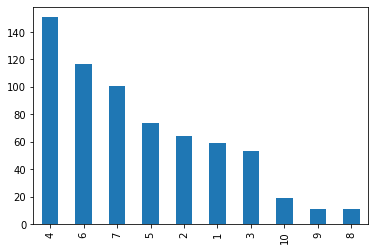

In [473]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["Total_Credit_Cards"]).plot(kind="bar")

### Distribution based on number of credit cards per customer

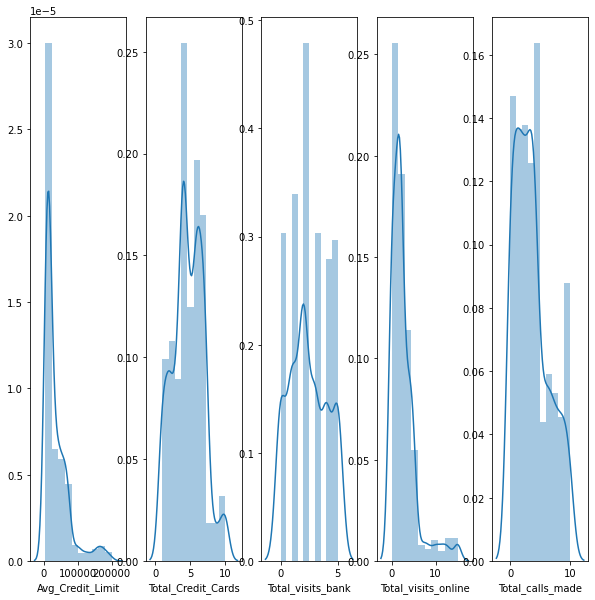

In [476]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 5, figsize=(10,10))
vis1 = sns.distplot(df["Avg_Credit_Limit"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["Total_Credit_Cards"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["Total_visits_bank"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["Total_visits_online"],bins=10, ax=ax[3])
vis4 = sns.distplot(df["Total_calls_made"],bins=10, ax=ax[4])
f.savefig('subplot.png')

### Distribution of values per data column. total credit cards, bank vists and call visits are uniform distribution, where as average credit limi and total visits online have a left skew and many outliers


Number of customers with credit between 4-7 cards for the majority of customers, customers with credits 1-3 and 8-10 are lower

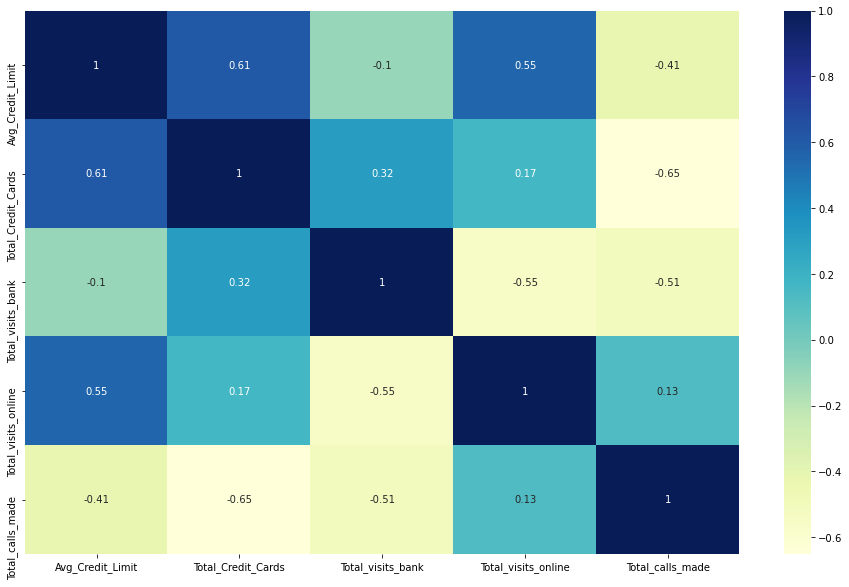

In [477]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

### Average Credit Limit has a high correlation with total Credit Cards and total visits online. Total Credit cards has a high corelaion with total visits to bank and average credit limit. Total visits bank has high correlation with total credit cards. total visits online has higher coorelation with total calls made . Total calls made does not any major correlation with any other value. 

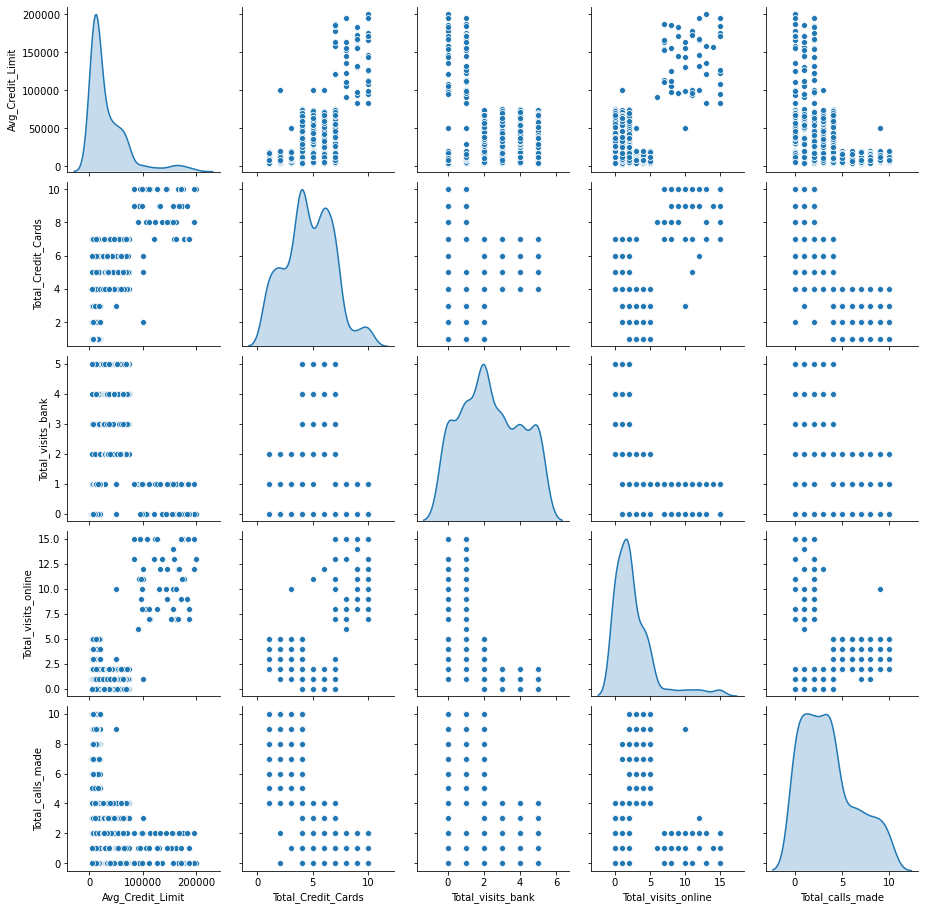

In [478]:
sns.pairplot(df,diag_kind='kde')

   ### Based on the pair plot, there appears to be 2-3 clusters

### Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [479]:
##Scale the data 
from scipy.stats import zscore

df_z = df.apply(zscore)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

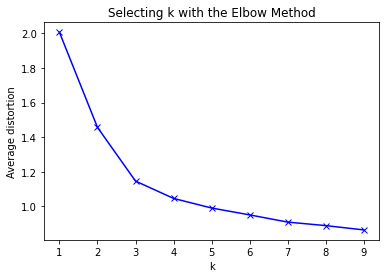

In [480]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Based on the elbow method K value of 3 seems to be the right point where the graph deflects and will be used for further analysis

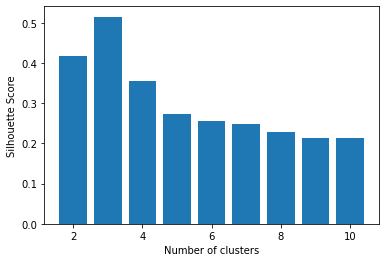

In [481]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_z, KMeans(n_clusters = n_cluster).fit_predict(df_z))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()


## Silhouette score at cluster K=3 is the highest

In [482]:
final_model=KMeans(3)
final_model.fit(df_z)
prediction=final_model.predict(df_z)

#Append the prediction 
df["K_Means_Cluster"] = prediction
df_z["K_Means_Cluster"] = prediction
print("K_Means_Cluster Assigned : \n")
df.head()

K_Means_Cluster Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_Means_Cluster
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [483]:
dfClust = df.groupby(['K_Means_Cluster'])
dfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_Means_Cluster,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


### There are 3 distinct clusters of data points. ### Cluster 0 with average creit of 2-3 credit cards and average credit of 12000 shows a pattern of making calls to customer services. Cluster 1 with 5-6 credit cards and 33700 average credit limit have a disposition of visiting bank for customer service and Cluster 2 with highest number of credit cards and average credit limit interact with customer service using online method.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206CDDC16D0>,
      dtype=object)

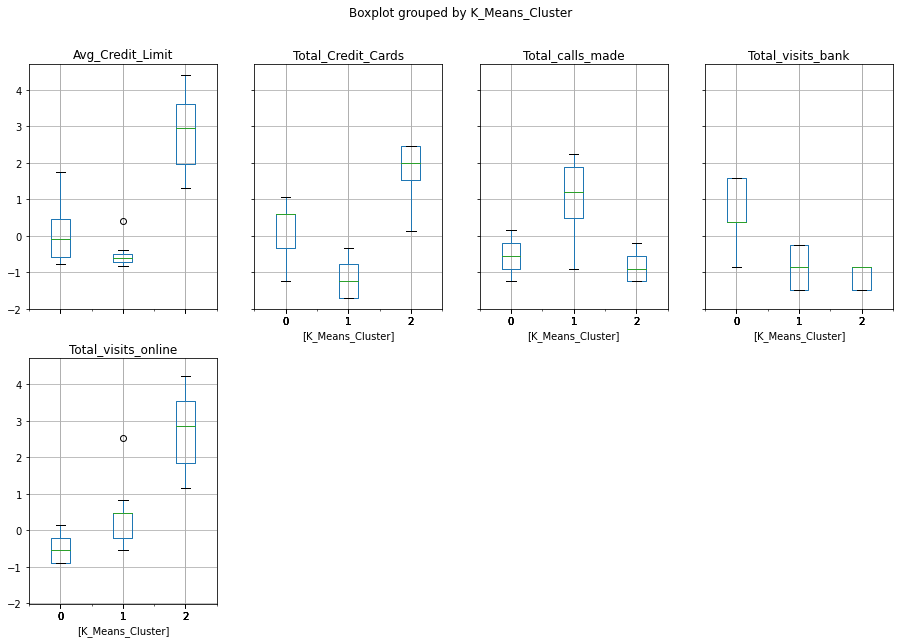

In [484]:
df_z.boxplot(by='K_Means_Cluster', layout = (2,4),figsize=(15,10))

### Based on box plot analysis of K-Means clusters, Cluster 0 makes more calls to customer service, Cluster 1 makes more bank visits and Cluster 2makes more online customer service inquiry

In [485]:
df_hc=df_z.drop('K_Means_Cluster',1)
df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

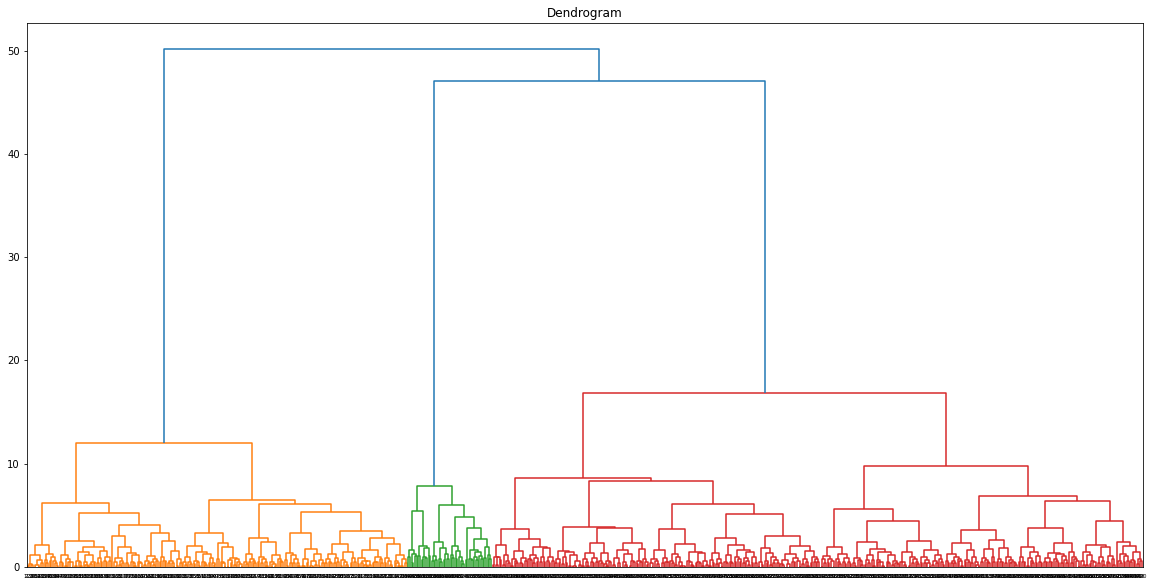

In [486]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(20,10))

merg = linkage(df_hc, method='ward')
dendrogram(merg, leaf_rotation = 360)
plt.title('Dendrogram')
plt.show()

### Analysis of the HC indicates that by taking a cut at 20, we will get 3 clusters. 

In [487]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(df_hc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_hc))

c

0.8977080867389372

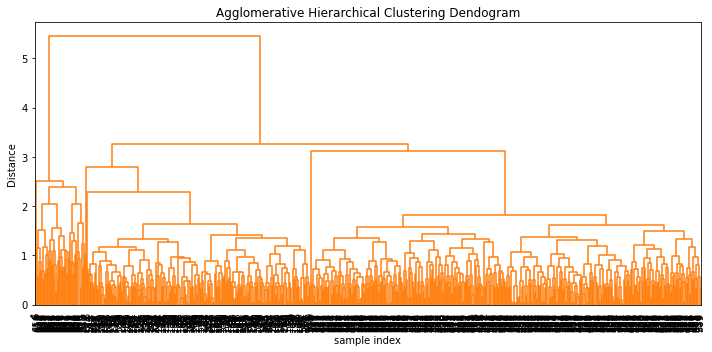

In [488]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [489]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_hc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_hc))

c

0.8599730607972423

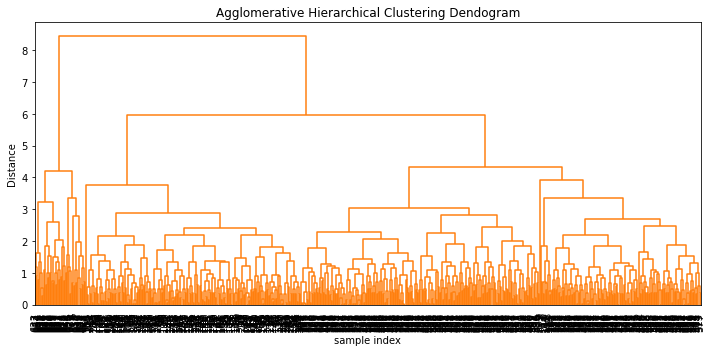

In [490]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [491]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_hc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_hc))

c

0.7415156284827493

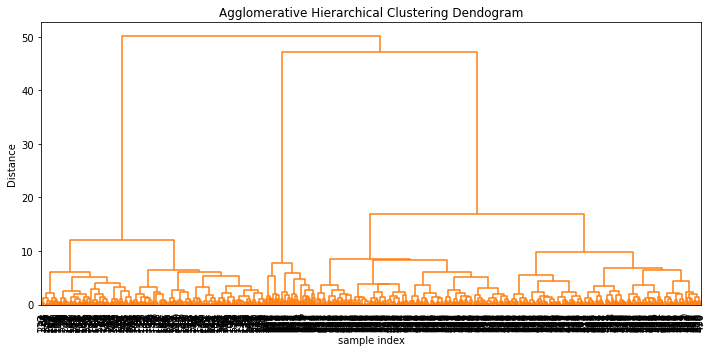

In [492]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

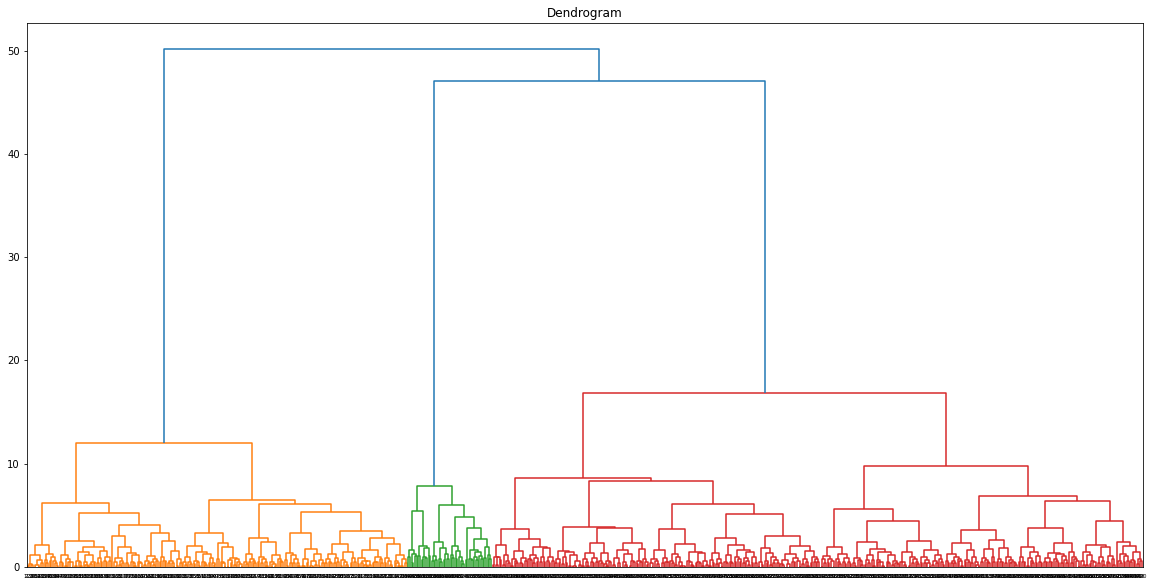

In [493]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(20,10))

merg = linkage(df_hc, method='ward')
dendrogram(merg, leaf_rotation = 360)
plt.title('Dendrogram')
plt.show()

In [494]:
# 3 clusters using complete linkage
from scipy.cluster.hierarchy import cut_tree
HC_cluster_labels = cut_tree(merg, n_clusters=3).reshape(-1, )
HC_cluster_labels

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [495]:
df_hc["Hierarchical_Cluster_labels"] = HC_cluster_labels

In [496]:
df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Hierarchical_Cluster_labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206DC2D2040>,
      dtype=object)

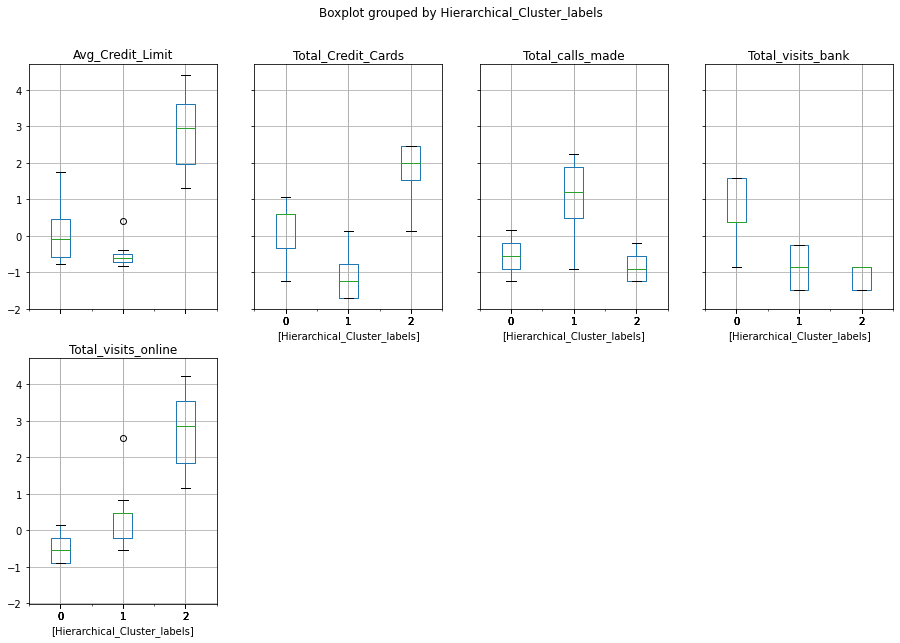

In [497]:
df_hc.boxplot(by='Hierarchical_Cluster_labels', layout = (2,4),figsize=(15,10))

### Calculate average silhouette score for both methods.

In [498]:

from sklearn import metrics
kmeans_values=[]
for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_z)
    sil_score = metrics.silhouette_score(df_z,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_z, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.434
Silhouette score for 3 cluster k-means: 0.541
Silhouette score for 4 cluster k-means: 0.369
Silhouette score for 5 cluster k-means: 0.277
Silhouette score for 6 cluster k-means: 0.260
Silhouette score for 7 cluster k-means: 0.252
Silhouette score for 8 cluster k-means: 0.229
Silhouette score for 9 cluster k-means: 0.229
Silhouette score for 10 cluster k-means: 0.211
Silhouette score for 11 cluster k-means: 0.208
Silhouette score for 12 cluster k-means: 0.208
Silhouette score for 13 cluster k-means: 0.214
Silhouette score for 14 cluster k-means: 0.214
Silhouette score for 15 cluster k-means: 0.215
Silhouette score for 16 cluster k-means: 0.215
Silhouette score for 17 cluster k-means: 0.214
Silhouette score for 18 cluster k-means: 0.221
Silhouette score for 19 cluster k-means: 0.221


In [499]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_hc)
        sil_score = metrics.silhouette_score(df_hc, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [500]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
2,2,0.579266,complete,2
1,2,0.579266,average,2
4,4,0.492706,average,4
0,2,0.432058,ward,2
7,6,0.425571,average,6
5,4,0.394362,complete,4
13,10,0.361786,average,10
3,4,0.361337,ward,4
10,8,0.359344,average,8
8,6,0.340898,complete,6


### Based on silhouette values, cluster value of 3 provides the best results and value

### Compare K-means clusters with Hierarchical clusters.

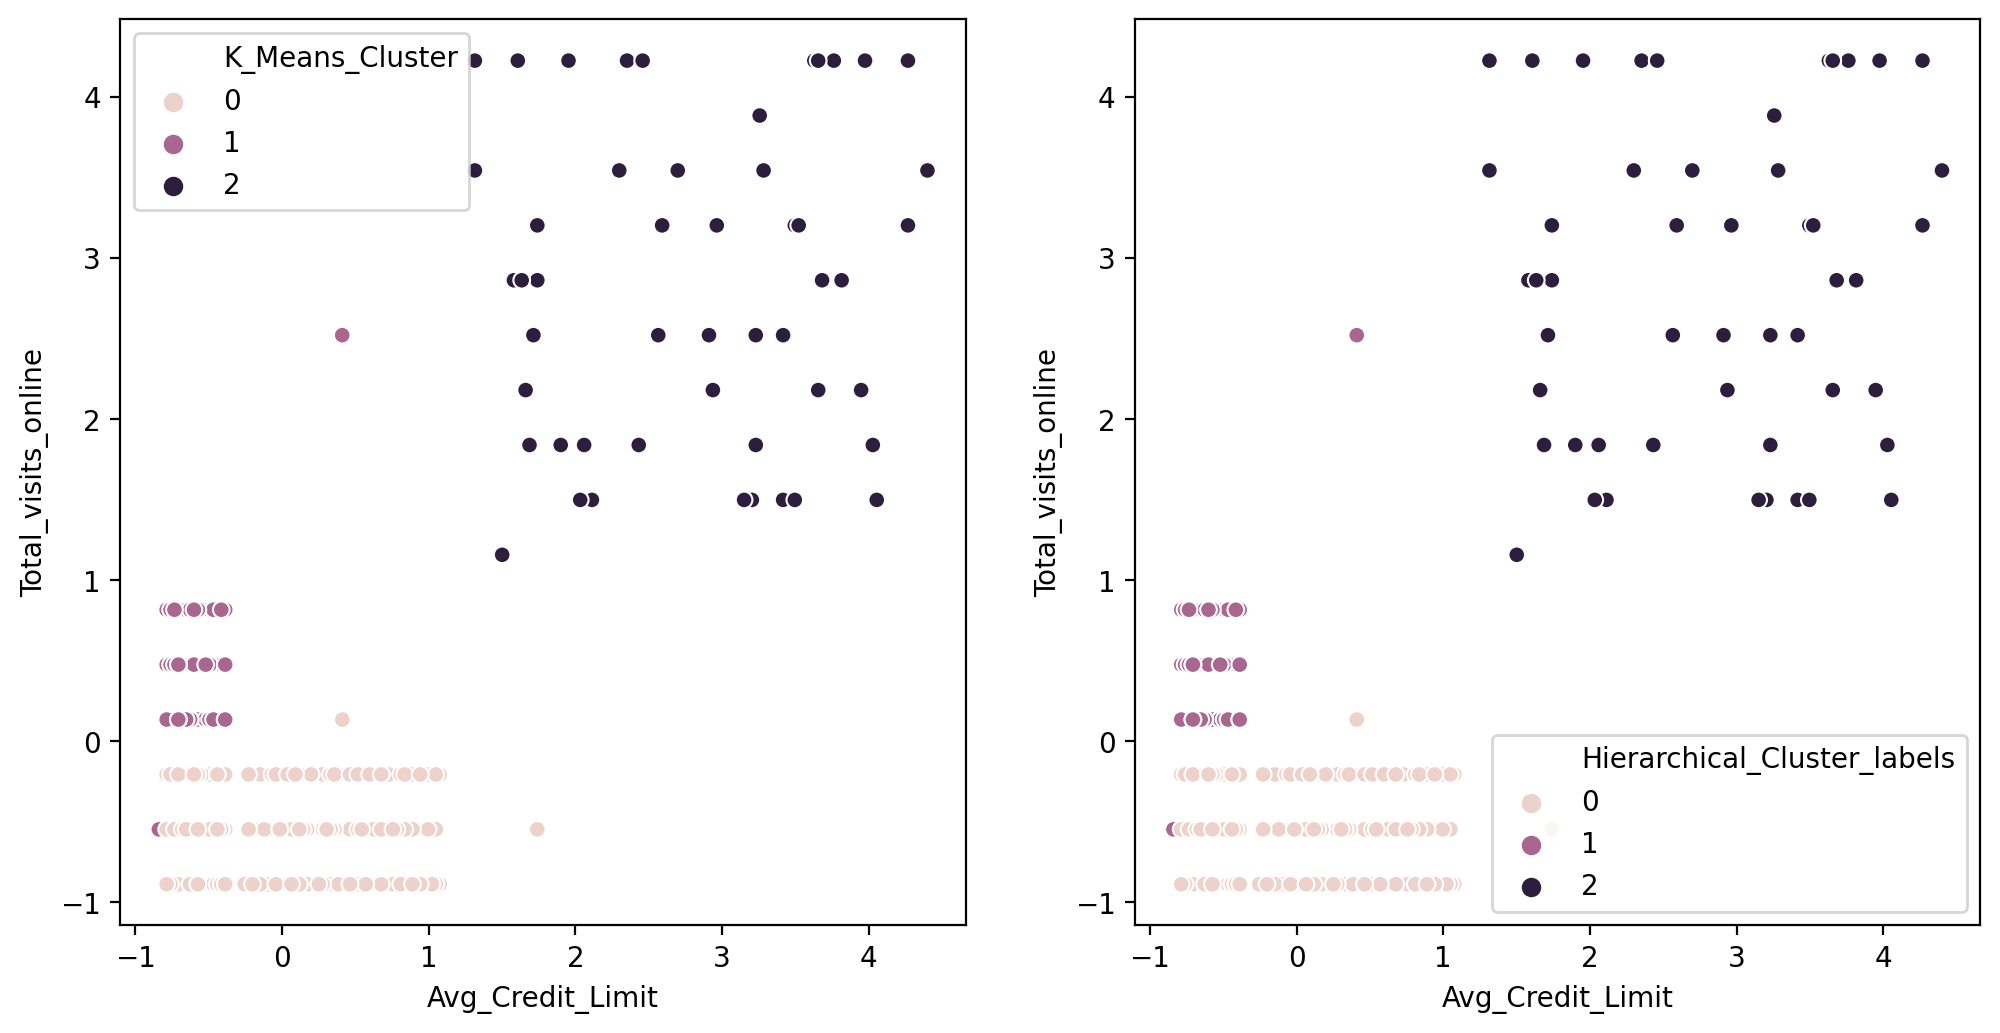

In [501]:
# scatter plot using the first two principal components to observe the cluster distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_visits_online',data=df_z,hue='K_Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_online',data=df_hc,hue='Hierarchical_Cluster_labels')


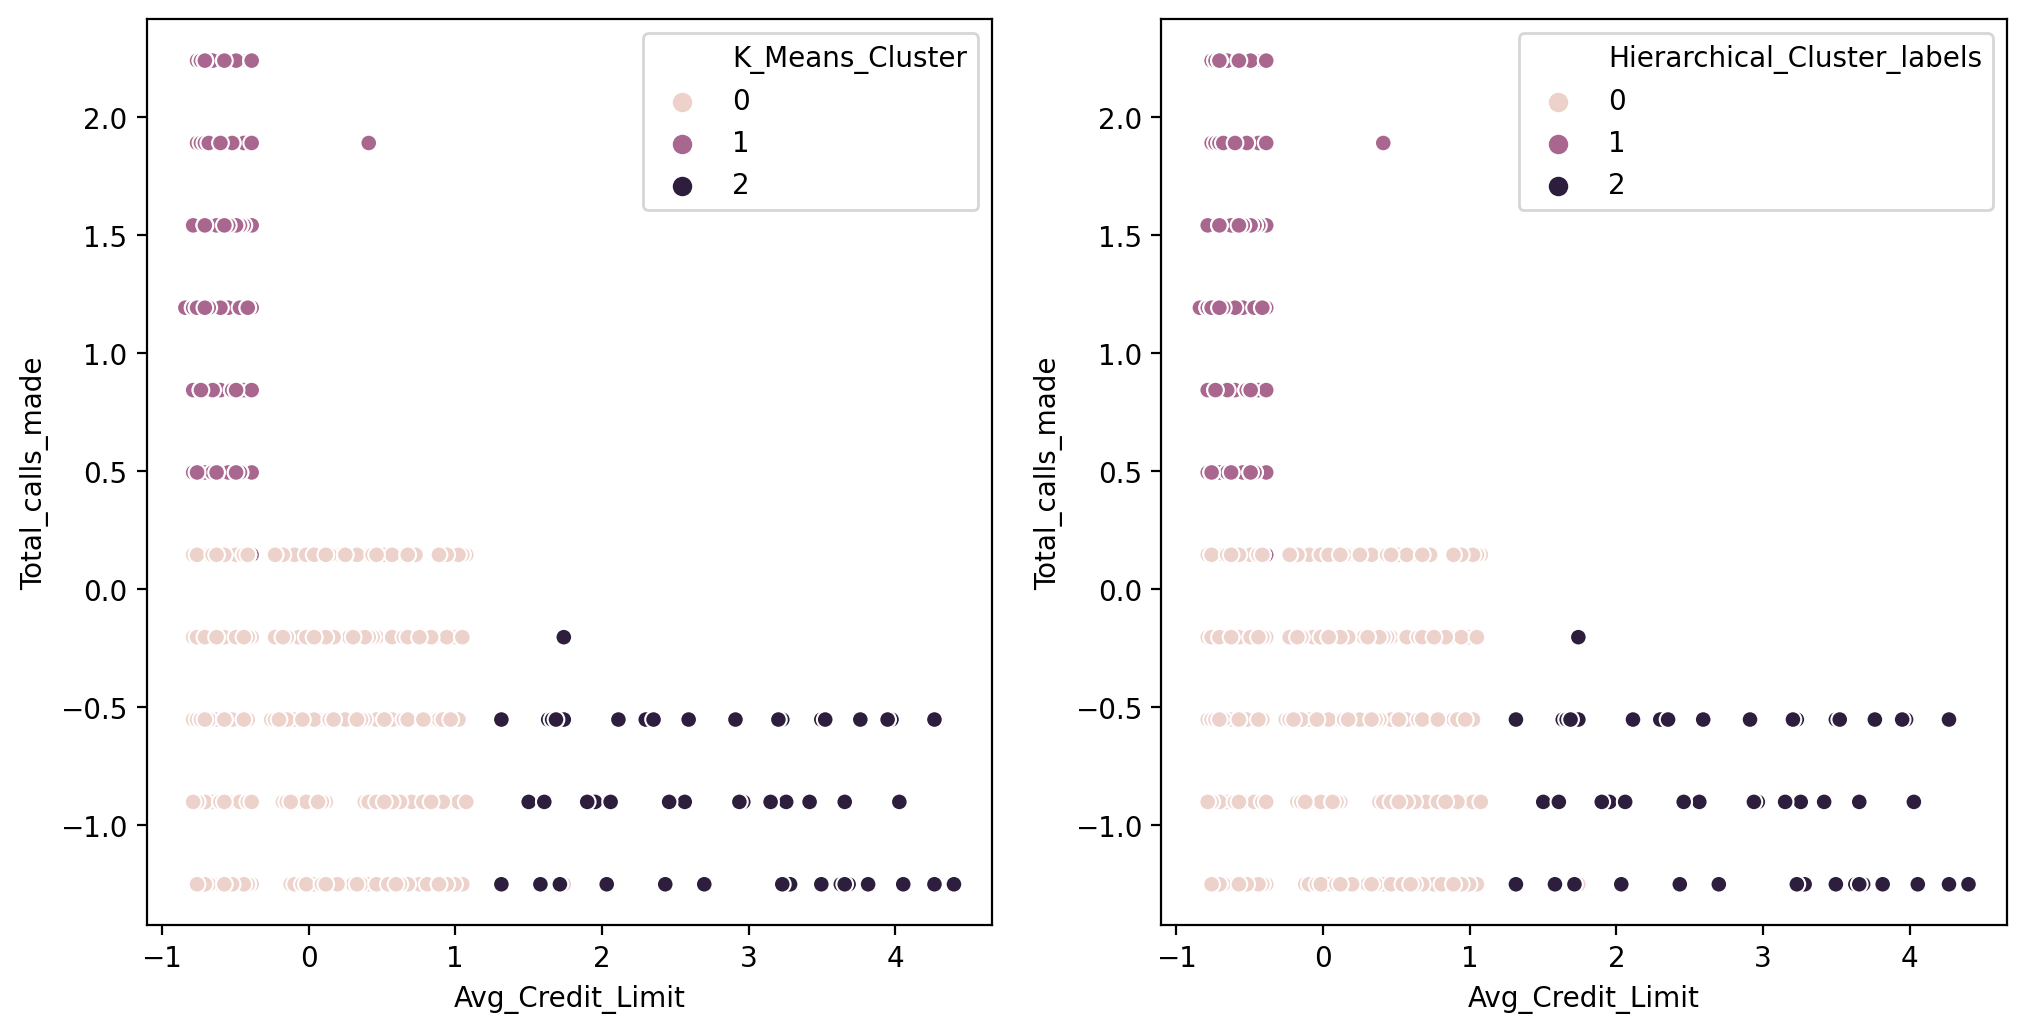

In [503]:
# scatter plot using the first two principal components to observe the cluster distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_calls_made',data=df_z,hue='K_Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_calls_made',data=df_hc,hue='Hierarchical_Cluster_labels')


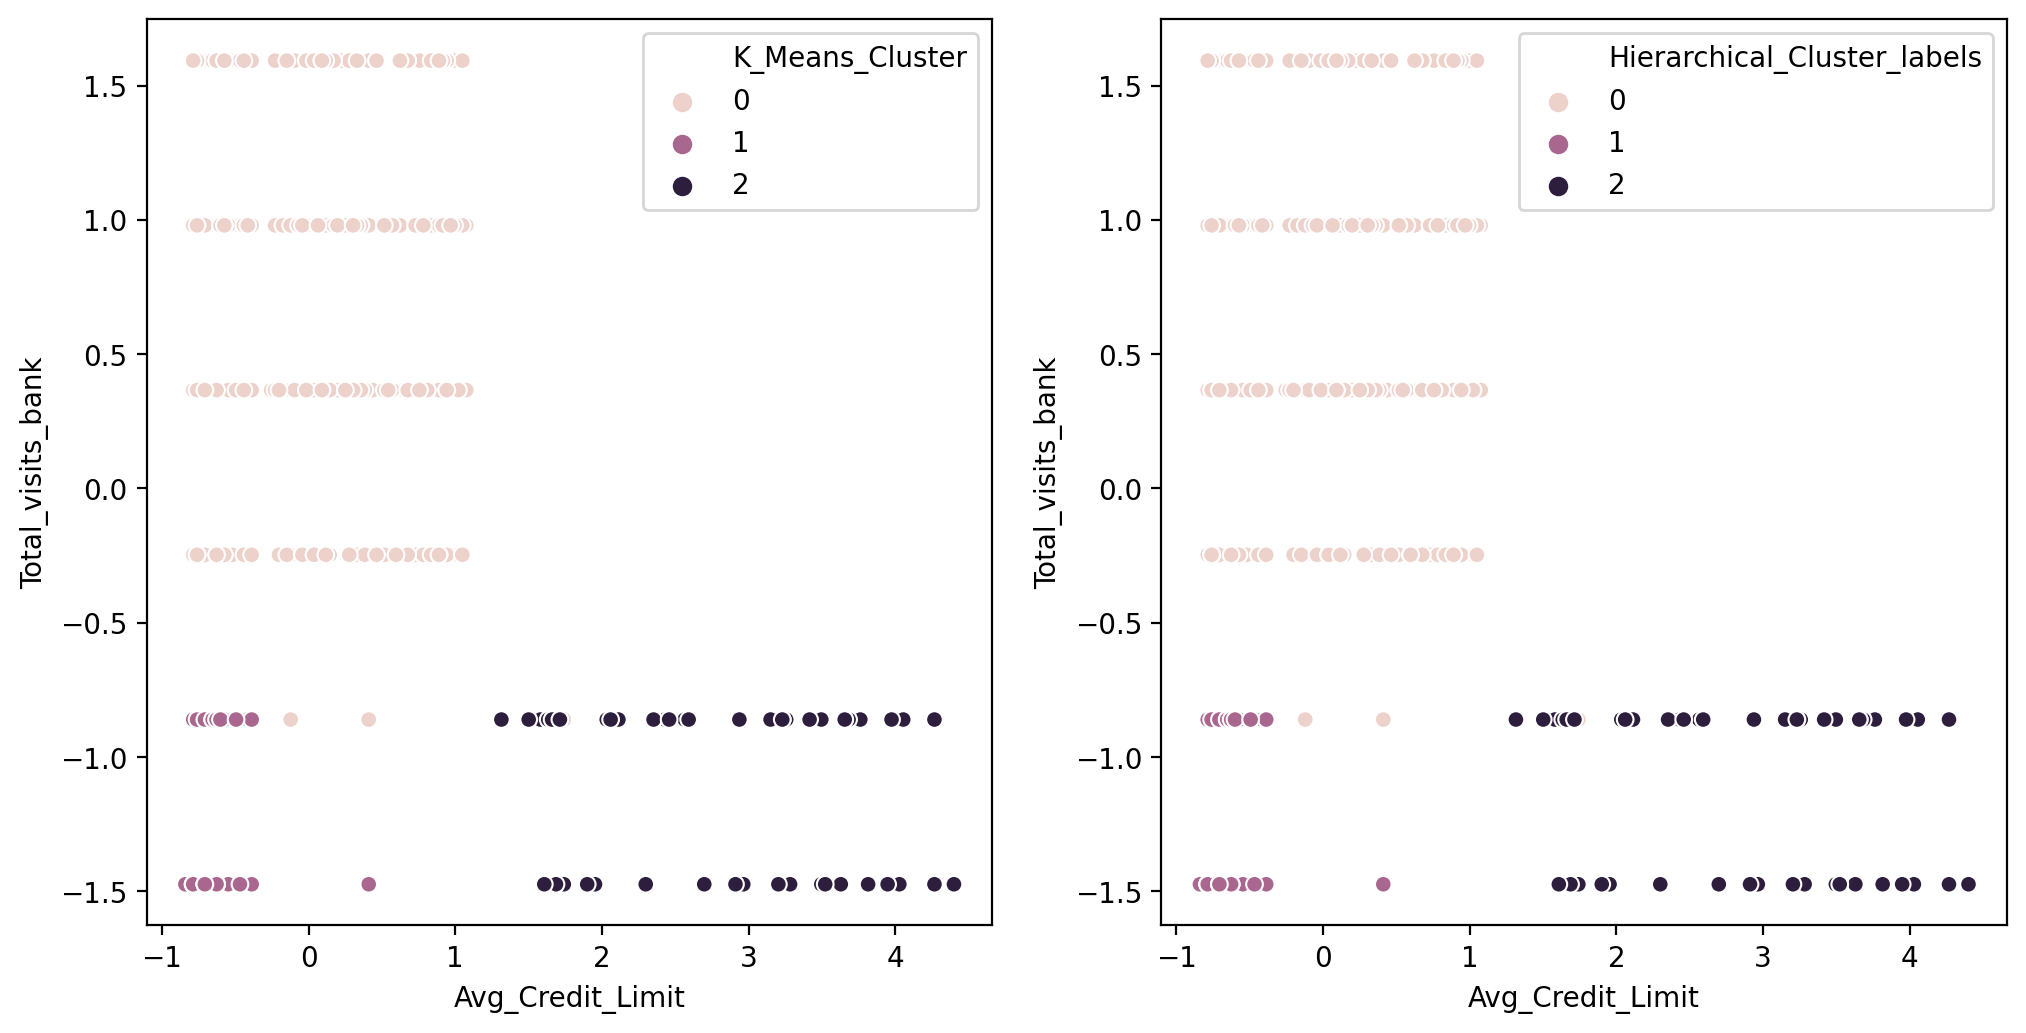

In [504]:
# scatter plot using the first two principal components to observe the cluster distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_visits_bank',data=df_z,hue='K_Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_bank',data=df_hc,hue='Hierarchical_Cluster_labels')

### Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions

### 
1. How many different segments of customers are there?
Based on the analysis done using K-Means and H-Clusters, Cluster pattern comparison and other data point, the customers can be broadly
segmented into 3 categories. 1. Based on Avg Credit Card Limit, 2. Based on number of credit cards 3. Based on their interaction 
with customer services. (3 Customer Segments)
2. How are these segments different from each other?
These segments are different from each other based on their credit limit, number of credit cards ownned and how they interact with the banks customer services.
3. What are your recommendations to the bank on how to better market to and service these customers?
The recommendations to the bank is to have different strategies to retain and increase customer value by target low value customers (avg credit limit and less than 3 credit card) with marketing strategies to increase their credit limits and offer incentives to acquire more credit cards. Also since these customers are primarily interacting with the bank over calls to the customer service center, an improved customer experience on the calls will help retain them and increase value
*** For customers who are in the mid range value (Less than 6 credit cards and avg credit card limit less than 34000 who prefer to visit the bank and interact directly with the bank, to focus marketing strategy to up-sell more when they visit the bank and also provide better experience at the bank location
**** for customers who are high value (greater than 6 credit cards and avg limit of 141,000, who prefer to interact using online method, the bank can focus on improving their experience online and upsell other services and ensure that these customers are retained and remain as customers